In [1]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
import math

In [2]:
def get_filter_size(sigma):
    s = (2 * math.ceil(3*sigma)) + 1
    return s

In [3]:
def calculate_log(x, y, sigma):
    return (-1/(math.pi*(sigma**4))) * (1 - ( ((x**2)+(y**2))/(2*(sigma**2)) ) ) * (math.e**( ((x**2)+(y**2)) / (2*(sigma**2)) ))

In [4]:
def calculate_filter(sigma):
    size = get_filter_size(sigma)
    log_filter = np.zeros((size,size))
    
    center_x = math.floor(size / 2)
    center_y = math.floor(size / 2)
    
    for i in range(size):
        for j in range(size):
            distance_x = abs(center_x - j)
            distance_y = abs(center_y - i)
            log_filter[i][j] = calculate_log(distance_x,distance_y,sigma)
            
    return log_filter, size

In [15]:
def detect_edge(img, sigma):
    original_img = img.copy()
    log_filter, size = calculate_filter(sigma)
    
    center_x = math.floor(size / 2)
    center_y = math.floor(size / 2)
    
    # Apply "log_filter" on "original_img" in some way
    # and put the values in "img"
    

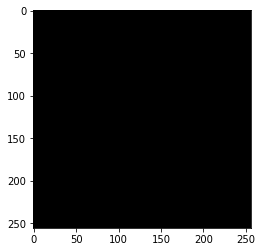

In [16]:
img = Image.open("Cameraman.tif")

img_result = img.copy()
detect_edge(img_result, 2)
plt.figure()
plt.imsave("LoG_2.jpg", img_result, cmap='gray')
plt.imshow(img_result, cmap="gray")

img_result = img.copy()
detect_edge(img_result, 3)
plt.figure()
plt.imsave("LoG_3.jpg", img_result, cmap='gray')
plt.imshow(img_result, cmap="gray")

img_result = img.copy()
detect_edge(img_result, 4)
plt.figure()
plt.imsave("LoG_4.jpg", img_result, cmap='gray')
plt.imshow(img_result, cmap="gray")